# NLP: Product Comment Sentiment Analysis

**Resources**
*   https://www.geeksforgeeks.org/what-is-sentiment-analysis/ (intro)
*   tutorial (https://www.datacamp.com/tutorial/text-analytics-beginners-nltk)
*   https://youtu.be/9p1KYtYAus8 & https://youtu.be/QpzMWQvxXWk?feature=shared (vader lexicon tutorial - for sentiment analysis)
*   dataset downloaded from https://www.kaggle.com/datasets/mdwaquarazam/headphone-dataset-review-analysis

<br><br>

Documents (bg study, methods etc will do later)

> Step 1: Get data (csv file)

> Step 2: Pre-processing. Tokenize, Lemmatize, remove stopwords, punctuations etc, then do sentiment analysis

> Step 3: Count vectorizer (frequency each words appeared), then identify similarity (use cosine similarity equation, correlation etc.)

> Step 4: each of us will choose our preferred method (bayes, knn, k-means)

> Step 5: compare the results (from using different methods)







# Getting Data & Setup


In [18]:
# install nltk (terminal line commands)
# %pip install --upgrade pip # ensure pip installer is 
%pip install nltk
%pip install pandas
%pip install -U scikit-learn

import nltk
import math
import site
import pandas as pd    # to allow us to read csv file
import random
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns # couldn't find module
#import re

from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize # for tokenization of words
from nltk.stem import WordNetLemmatizer # for lemmatization
from sklearn.metrics import confusion_matrix # confusion matrix (evaluate performance of nltk sentiment analyzer)
from sklearn.metrics import classification_report

plt.style.use('ggplot')
nltk.download('all')
site.getsitepackages() # to find our current path, we imported site, and getsitepackages()

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]    |   Pac

['c:\\Users\\User\\AppData\\Local\\Programs\\Python\\Python39',
 'c:\\Users\\User\\AppData\\Local\\Programs\\Python\\Python39\\lib\\site-packages']

# Read data

In [2]:
data = pd.read_csv('headphone_datn.csv')

In [3]:
# data.head()
total = data.count()
print(total)

Customer_Name    1604
REVIEW_TITLE     1594
Color            1604
REVIEW_DATE      1604
COMMENTS         1546
RATINGS          1604
dtype: int64


Shows the Ratings by the reviewers

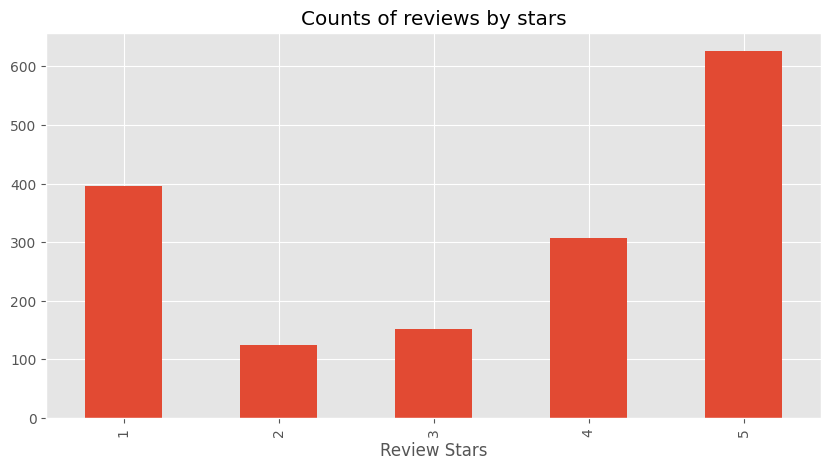

In [4]:
# to indicate how many rating is occupied
ax = data['RATINGS'].value_counts().sort_index().plot(kind='bar', title= 'Counts of reviews by stars', figsize=(10, 5))
ax.set_xlabel('Review Stars')
plt.show() # show bar chart

# Pre-Processing

In [5]:
# create pre processing function
def preprocess_data(text):

  # tokenize the text (and make it lowercase)
  tokens = word_tokenize(text.lower())

  # remove stop words
  filtered_tokens = [token for token in tokens if token not in stopwords.words('english')]

  # lemmatize the tokens
  lemmatizer = WordNetLemmatizer()
  lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]

  #Join the tokens back into a string
  processed_text = ' '.join(lemmatized_tokens)

  return processed_text


# remove punctuations from data
data['COMMENTS'].dropna(inplace=True)
data['COMMENTS'] = data['COMMENTS'].astype(str) # convert data to 'string' data type

# Preprocess_data
# create a column called 'tokenized'
data['Processed'] = data.apply(lambda x: preprocess_data(x['COMMENTS']), axis=1) # applying the preprocess_data function to the 'COMMENTS' column of  the DataFrame
data # display resulting table

,Customer_Name,REVIEW_TITLE,Color,REVIEW_DATE,COMMENTS,RATINGS,Processed
0,Ramdika,Really Exceed my expectation.,Black,30-May-21,Okay.. I was skeptical at first to buy this as...,5,"okay .. skeptical first buy tight budget , hon..."
1,Sachin AK,Great for a change from inear buds,Black,01-Jun-21,The earphone is worth what you pay for. The de...,5,earphone worth pay . design earbud may cause p...
2,Manikandan Raj,For people with sensitive ears,Black,05-Sep-21,"Particularly for people with sensitive ears, w...",4,"particularly people sensitive ear , get ear pa..."
3,Reviewguy,I tested it for a week and here's a detailed r...,Iguana,11-Sep-21,Built Quality 6.5 10The lower wire is a durabl...,4,built quality 6.5 10the lower wire durable nyl...
4,Sridhar Sarkar,Not a good headphone,Iguana,26-Jun-21,Don't go with the over all 4 start rating. Thi...,2,n't go 4 start rating . boat brand endorse lot...
...,...,...,...,...,...,...,...
1599,Darshan,Simply fine,Blue,11-Jun-22,Quite good sound qualityAnd had impressively g...,4,quite good sound qualityand impressively good ...
1600,Happy Singh,Value for money,Spirit Lime,13-Jun-22,Osm,5,osm
1601,sushanth,Value for money,White,09-Jun-22,"Earphones fits well onto the ears, doesn't blo...",5,"earphone fit well onto ear , n't block ear out..."
1602,Mayuri shinde,Duplicate headphones... Not worth for price,White,09-Jun-22,Sound quality very bad... Over all very bad pr...,1,sound quality bad ... bad product ... happy buy


# Sentiment Analysis

In [12]:
# creating NLTK sentiment analyzer (via nltk.sentiment.vader library)
analyzer = SentimentIntensityAnalyzer()

# create get_positive_score function
def get_positive_score(text):
    # take text string as input, get sentiment scores pos/neg/neutral (dictionary data type {key:value}) using polarity_scores method
    # polarity score includes score for pos, neg, and neutral (assign sentiment value depending on whether positive score is +ve or - ve, values above 0 classified positive)

    scores = analyzer.polarity_scores(text) # sentiment scores (pos, neg, neutral) parse as dictionary type into scores (accessed later as scores[key])
    positive_score = math.ceil(scores['pos']) # ceil() rounds score to the next greater nearest integer. E.g 0.201 round to 1, -0.2 round to 0

    return positive_score

# create get_sentiment function
def get_sentiment(text):

    scores = analyzer.polarity_scores(text) # sentiment scores (pos, neg, neutral) parse as dictionary type into scores (accessed later as scores[key])
    sentiment = 1 if scores['pos'] > 0 else 0 # assign sentiment score based on text's POSITIVE score 
   
    return sentiment

 # create new column called 'Positive' and apply get_sentiment function
data['Positive'] = data['COMMENTS'].apply(get_positive_score)

# create new column called 'sentiment' and apply get_sentiment function
data['Sentiment'] = data['COMMENTS'].apply(get_sentiment) # applying the get_sentiment function to each value in the 'COMMENTS' column (row by row)


data # display table





,Customer_Name,REVIEW_TITLE,Color,REVIEW_DATE,COMMENTS,RATINGS,Processed,Positive,Sentiment
0,Ramdika,Really Exceed my expectation.,Black,30-May-21,Okay.. I was skeptical at first to buy this as...,5,"okay .. skeptical first buy tight budget , hon...",1,1
1,Sachin AK,Great for a change from inear buds,Black,01-Jun-21,The earphone is worth what you pay for. The de...,5,earphone worth pay . design earbud may cause p...,1,1
2,Manikandan Raj,For people with sensitive ears,Black,05-Sep-21,"Particularly for people with sensitive ears, w...",4,"particularly people sensitive ear , get ear pa...",1,1
3,Reviewguy,I tested it for a week and here's a detailed r...,Iguana,11-Sep-21,Built Quality 6.5 10The lower wire is a durabl...,4,built quality 6.5 10the lower wire durable nyl...,1,1
4,Sridhar Sarkar,Not a good headphone,Iguana,26-Jun-21,Don't go with the over all 4 start rating. Thi...,2,n't go 4 start rating . boat brand endorse lot...,1,1
...,...,...,...,...,...,...,...,...,...
1599,Darshan,Simply fine,Blue,11-Jun-22,Quite good sound qualityAnd had impressively g...,4,quite good sound qualityand impressively good ...,1,1
1600,Happy Singh,Value for money,Spirit Lime,13-Jun-22,Osm,5,osm,0,0
1601,sushanth,Value for money,White,09-Jun-22,"Earphones fits well onto the ears, doesn't blo...",5,"earphone fit well onto ear , n't block ear out...",1,1
1602,Mayuri shinde,Duplicate headphones... Not worth for price,White,09-Jun-22,Sound quality very bad... Over all very bad pr...,1,sound quality bad ... bad product ... happy buy,0,0


In [20]:
# check performance of sentiment analyzer

# confusion_matrix is a function evaluates the performance of a classification model by comparing the predicted labels with the actual labels (pass two arguments, data['Positive'] and data['Sentiment'].)
# shows the number of true positives, false positives, true negatives, and false negatives (The rows of the matrix represent the actual labels, while the columns represent the predicted labels)
# diagonal elements of the matrix represent the number of correct predictions, while the off-diagonal elements represent the number of incorrect predictions.

print(confusion_matrix(data['Positive'], data['Sentiment'])) 
print("")
print(classification_report(data['Positive'], data['Sentiment']))

[[ 540    0]
 [   0 1064]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       540
           1       1.00      1.00      1.00      1064

    accuracy                           1.00      1604
   macro avg       1.00      1.00      1.00      1604
weighted avg       1.00      1.00      1.00      1604

